In [1]:
import matplotlib.image as mpimg
from matplotlib import pyplot as plt

from fastai.vision.all import *

from PIL import Image
import pandas as pd
import numpy as np
import json

In [60]:
import fastai
fastai.__version__

'2.5.3'

# SKIP TO SAVED MODEL
    

## Data exploring and manipulation

In [2]:
with open('data/label_descriptions.json', 'r') as file:
    label_desc = json.load(file)
sample_sub_df = pd.read_csv('data/sample_submission.csv')
train_df = pd.read_csv('data/train.csv')

In [3]:
supercategories = []
for val in label_desc['categories']:
    if val['supercategory'] not in supercategories:
        supercategories.append(val['supercategory'])
supercategories_dict = { val:i for i, val in enumerate(supercategories) }

superattributes = []
for val in label_desc['attributes']:
    if val['supercategory'] not in superattributes:
        superattributes.append(val['supercategory'])
superattributes.append('na')
superattributes_dict = { val:i for i, val in enumerate(superattributes) }

category_dict = { i['id']:[i['name'], i['supercategory'], i['level']] for i in label_desc['categories'] }
attribute_dict = { i['id']:[i['name'], i['supercategory'], i['level']] for i in label_desc['attributes'] }
attribute_dict[341] = ['na', 'na', 0]

In [4]:
category2super_dict = {}
for key, val in zip(category_dict.keys(), category_dict.values()):
    if supercategories_dict[val[1]] not in category2super_dict.keys():
        category2super_dict[supercategories_dict[val[1]]] = [key]
    else:
        category2super_dict[supercategories_dict[val[1]]].append(key)

attribute2super_dict = {}
for key, val in zip(attribute_dict.keys(), attribute_dict.values()):
    if superattributes_dict[val[1]] not in attribute2super_dict.keys():
        attribute2super_dict[superattributes_dict[val[1]]] = [key]
    else:
        attribute2super_dict[superattributes_dict[val[1]]].append(key)

In [5]:
train_df['AttributesIds'] = train_df['AttributesIds'].fillna(341) # 341 is the `Not Available` class'''

In [6]:
str2list = lambda val: np.array([int(i) for i in str(val).split(',')])
train_df['AttributesIds'] = train_df['AttributesIds'].apply(str2list)

to_supercategory = lambda val: supercategories_dict[category_dict[val][1]]
train_df['SuperCategory'] = train_df['ClassId'].apply(to_supercategory)

to_superattribute = lambda val: np.array([ superattributes_dict[attribute_dict[i][1]] for i in val ])
train_df['SuperAttribute'] = train_df['AttributesIds'].apply(to_superattribute)

print(len(train_df.ImageId.unique()))
print(train_df.describe())
train_df.iloc[:10]

45623
              Height         Width        ClassId  SuperCategory
count  333401.000000  333401.00000  333401.000000  333401.000000
mean     2235.524021    1761.97925      23.322135       6.590313
std      1543.320481    1425.54039      11.376693       3.507974
min       296.000000     151.00000       0.000000       0.000000
25%      1024.000000     720.00000      14.000000       3.000000
50%      1600.000000    1200.00000      28.000000       9.000000
75%      3000.000000    2275.00000      32.000000       9.000000
max      8688.000000   10717.00000      45.000000      11.000000


,ImageId,EncodedPixels,Height,Width,ClassId,AttributesIds,SuperCategory,SuperAttribute
0,00000663ed1ff0c4e0132b9b9ac53f6e,6068157 7 6073371 20 6078584 34 6083797 48 6089010 62 6094223 72 6099436 76 6104649 80 6109862 85 6115075 89 6120288 93 6125501 98 6130714 102 6135927 106 6141140 111 6146354 114 6151567 118 6156780 123 6161993 127 6167206 131 6172419 136 6177632 140 6182845 144 6188058 149 6193271 153 6198484 157 6203697 162 6208910 166 6214124 169 6219337 174 6224550 178 6229763 182 6234976 187 6240189 191 6245402 195 6250615 200 6255828 204 6261041 208 6266254 213 6271467 218 6276680 224 6281893 229 6287107 233 6292320 238 6297533 244 6302746 249 6307959 254 6313172 259 6318385 265 6323598 270 6328811 2...,5214,3676,6,"[115, 136, 143, 154, 230, 295, 316, 317]",1,"[1, 1, 2, 3, 5, 6, 8, 9]"
1,00000663ed1ff0c4e0132b9b9ac53f6e,6323163 11 6328356 32 6333549 53 6338742 75 6343935 96 6349128 117 6354321 138 6359514 159 6364715 172 6369923 179 6375131 185 6380339 191 6385547 197 6390755 203 6395963 210 6401171 216 6406379 222 6411587 228 6416795 234 6422003 240 6427211 247 6432420 252 6437628 258 6442836 264 6448044 270 6453252 276 6458460 283 6463668 289 6468876 295 6474084 301 6479292 307 6484500 313 6489708 320 6494916 326 6500124 332 6505332 338 6510540 344 6515748 351 6520956 357 6526164 363 6531372 369 6536580 375 6541789 380 6546997 387 6552205 393 6557413 399 6562621 405 6567829 411 6573037 417 6578245 424 6...,5214,3676,0,"[115, 136, 142, 146, 225, 295, 316, 317]",0,"[1, 1, 2, 3, 5, 6, 8, 9]"
2,00000663ed1ff0c4e0132b9b9ac53f6e,8521389 10 8526585 30 8531789 42 8537002 46 8542215 49 8547428 52 8552641 55 8557854 58 8563067 61 8568279 66 8573492 69 8578705 72 8583918 75 8589131 78 8594344 82 8599557 85 8604769 89 8609982 92 8615195 95 8620408 98 8625621 102 8630834 105 8636047 108 8641259 112 8646472 115 8651685 118 8656898 122 8662111 125 8667324 128 8672537 131 8677750 134 8682962 139 8688175 142 8693388 145 8698601 148 8703814 87 8703904 61 8709027 87 8709122 59 8714240 87 8714341 57 8719452 87 8719559 55 8724665 87 8724777 53 8729878 87 8729995 51 8735091 86 8735214 48 8740304 86 8740432 47 8745517 86 8745648 4...,5214,3676,28,[163],9,[0]
3,00000663ed1ff0c4e0132b9b9ac53f6e,12903854 2 12909064 7 12914275 10 12919485 15 12924695 19 12929905 24 12935116 28 12940326 32 12945536 37 12950746 41 12955957 45 12961167 49 12966377 54 12971587 59 12976798 62 12982008 67 12987218 71 12992428 76 12997639 79 13002849 84 13008059 89 13013269 93 13018480 97 13023690 101 13028900 106 13034110 110 13039321 114 13044531 119 13049741 123 13054951 128 13060162 131 13065372 136 13070582 140 13075792 145 13081003 149 13086213 153 13091423 158 13096633 162 13101844 166 13107054 170 13112264 175 13117474 179 13122685 183 13127895 188 13133105 192 13138315 197 13143526 200 13148736 2...,5214,3676,31,"[160, 204]",9,"[3, 0]"
4,00000663ed1ff0c4e0132b9b9ac53f6e,10837337 5 10842542 14 10847746 24 10852951 33 10858155 43 10863360 52 10868564 62 10873769 72 10878973 82 10884178 91 10889383 100 10894587 110 10899792 119 10905001 124 10910215 124 10915429 124 10920643 124 10925857 124 10931071 124 10936285 124 10941499 124 10946713 125 10951927 125 10957141 125 10962355 125 10967569 125 10972783 125 10977997 125 10983211 125 10988425 125 10993639 125 10998853 125 11004067 125 11009281 125 11014495 125 11019709 126 11024923 126 11030137 126 11035351 126 11040565 126 11045779 126 11050993 126 11056207 126 11061421 126 11066635 126 11071849 126 11077063 ...,5214,3676,32,[219],9,[0]
5,00000663ed1ff0c4e0132b9b9ac53f6e,11464158 10 11469372 30 11474586 43 11479800 48 11485013 54 11490227 59 11495441 64 11500655 70 11505869 75 11511083 80 11516297 85 11521511 90 11526725 96 11531938 102 11537152 107 11542366 112 11547580 120 11552794 130 11558008 140 11563222 150 11568436 160 11573650 170 11578863 181 11584077 191 11589291 201 11594505 211 11599719 216 11604933 218 11610147 219 11615361 220 11620575 221 11625789 222 11631002 225 11636216 226 11641430 227 116466

In [7]:
imagedf = pd.read_csv("ImageData.csv")

In [8]:
categories_df = pd.DataFrame(label_desc['categories'])
attributes_df = pd.DataFrame(label_desc['attributes'])

In [9]:
cat_map = {category["id"]: category["name"] for category in label_desc['categories']}
cat_map_inv = {category["name"]: category["id"] for category in label_desc['categories']}
 
attr_map = {category["id"]: category["name"] for category in label_desc['attributes']}
attr_map_inv = {category["name"]: category["id"] for category in label_desc['attributes']}

In [11]:
train_df['ClassId'] = train_df['ClassId'].map(cat_map)
train_df['ClassId'] = train_df['ClassId'].astype('category')

In [12]:
train_df

,ImageId,EncodedPixels,Height,Width,ClassId,AttributesIds,SuperCategory,SuperAttribute
0,00000663ed1ff0c4e0132b9b9ac53f6e,6068157 7 6073371 20 6078584 34 6083797 48 6089010 62 6094223 72 6099436 76 6104649 80 6109862 85 6115075 89 6120288 93 6125501 98 6130714 102 6135927 106 6141140 111 6146354 114 6151567 118 6156780 123 6161993 127 6167206 131 6172419 136 6177632 140 6182845 144 6188058 149 6193271 153 6198484 157 6203697 162 6208910 166 6214124 169 6219337 174 6224550 178 6229763 182 6234976 187 6240189 191 6245402 195 6250615 200 6255828 204 6261041 208 6266254 213 6271467 218 6276680 224 6281893 229 6287107 233 6292320 238 6297533 244 6302746 249 6307959 254 6313172 259 6318385 265 6323598 270 6328811 2...,5214,3676,pants,"[115, 136, 143, 154, 230, 295, 316, 317]",1,"[1, 1, 2, 3, 5, 6, 8, 9]"
1,00000663ed1ff0c4e0132b9b9ac53f6e,6323163 11 6328356 32 6333549 53 6338742 75 6343935 96 6349128 117 6354321 138 6359514 159 6364715 172 6369923 179 6375131 185 6380339 191 6385547 197 6390755 203 6395963 210 6401171 216 6406379 222 6411587 228 6416795 234 6422003 240 6427211 247 6432420 252 6437628 258 6442836 264 6448044 270 6453252 276 6458460 283 6463668 289 6468876 295 6474084 301 6479292 307 6484500 313 6489708 320 6494916 326 6500124 332 6505332 338 6510540 344 6515748 351 6520956 357 6526164 363 6531372 369 6536580 375 6541789 380 6546997 387 6552205 393 6557413 399 6562621 405 6567829 411 6573037 417 6578245 424 6...,5214,3676,"shirt, blouse","[115, 136, 142, 146, 225, 295, 316, 317]",0,"[1, 1, 2, 3, 5, 6, 8, 9]"
2,00000663ed1ff0c4e0132b9b9ac53f6e,8521389 10 8526585 30 8531789 42 8537002 46 8542215 49 8547428 52 8552641 55 8557854 58 8563067 61 8568279 66 8573492 69 8578705 72 8583918 75 8589131 78 8594344 82 8599557 85 8604769 89 8609982 92 8615195 95 8620408 98 8625621 102 8630834 105 8636047 108 8641259 112 8646472 115 8651685 118 8656898 122 8662111 125 8667324 128 8672537 131 8677750 134 8682962 139 8688175 142 8693388 145 8698601 148 8703814 87 8703904 61 8709027 87 8709122 59 8714240 87 8714341 57 8719452 87 8719559 55 8724665 87 8724777 53 8729878 87 8729995 51 8735091 86 8735214 48 8740304 86 8740432 47 8745517 86 8745648 4...,5214,3676,collar,[163],9,[0]
3,00000663ed1ff0c4e0132b9b9ac53f6e,12903854 2 12909064 7 12914275 10 12919485 15 12924695 19 12929905 24 12935116 28 12940326 32 12945536 37 12950746 41 12955957 45 12961167 49 12966377 54 12971587 59 12976798 62 12982008 67 12987218 71 12992428 76 12997639 79 13002849 84 13008059 89 13013269 93 13018480 97 13023690 101 13028900 106 13034110 110 13039321 114 13044531 119 13049741 123 13054951 128 13060162 131 13065372 136 13070582 140 13075792 145 13081003 149 13086213 153 13091423 158 13096633 162 13101844 166 13107054 170 13112264 175 13117474 179 13122685 183 13127895 188 13133105 192 13138315 197 13143526 200 13148736 2...,5214,3676,sleeve,"[160, 204]",9,"[3, 0]"
4,00000663ed1ff0c4e0132b9b9ac53f6e,10837337 5 10842542 14 10847746 24 10852951 33 10858155 43 10863360 52 10868564 62 10873769 72 10878973 82 10884178 91 10889383 100 10894587 110 10899792 119 10905001 124 10910215 124 10915429 124 10920643 124 10925857 124 10931071 124 10936285 124 10941499 124 10946713 125 10951927 125 10957141 125 10962355 125 10967569 125 10972783 125 10977997 125 10983211 125 10988425 125 10993639 125 10998853 125 11004067 125 11009281 125 11014495 125 11019709 126 11024923 126 11030137 126 11035351 126 11040565 126 11045779 126 11050993 126 11056207 126 11061421 126 11066635 126 11071849 126 11077063 ...,5214,3676,pocket,[219],9,[0]
...,...,...,...,...,...,...,...,...
333396,fffe20b555b98c3c1f26c8dfff275cbc,2712731 8 2715725 23 2718719 39 2721713 55 2724708 69 2727702 85 2730700 92 2733703 91 2736706 89 2739709 87 2742712 85 2745715 83 2748717 83 2751720 81 2754722 80 2757723 80 2760725 79 2763727 78 2766729 78 2769731 77 2772732 77 2775734 76 2778736 75 2781738 57 2781799 13 2784739 49 2784800 13 2787741 44 2787802 11 2790743 41 2790803 11 2793745 38 2793804 10 2796746 37 2796

In [13]:
supercategories_dict

{'upperbody': 0,
 'lowerbody': 1,
 'wholebody': 2,
 'head': 3,
 'neck': 4,
 'arms and hands': 5,
 'waist': 6,
 'legs and feet': 7,
 'others': 8,
 'garment parts': 9,
 'closures': 10,
 'decorations': 11}

In [15]:
train_df = train_df[train_df.SuperCategory == 9] #(train_df.SuperCategory == 0) | (train_df.SuperCategory == 2) | 
#train_df = train_df[train_df.ClassId == "sleeve"]
train_df

,ImageId,EncodedPixels,Height,Width,ClassId,AttributesIds,SuperCategory,SuperAttribute
2,00000663ed1ff0c4e0132b9b9ac53f6e,8521389 10 8526585 30 8531789 42 8537002 46 8542215 49 8547428 52 8552641 55 8557854 58 8563067 61 8568279 66 8573492 69 8578705 72 8583918 75 8589131 78 8594344 82 8599557 85 8604769 89 8609982 92 8615195 95 8620408 98 8625621 102 8630834 105 8636047 108 8641259 112 8646472 115 8651685 118 8656898 122 8662111 125 8667324 128 8672537 131 8677750 134 8682962 139 8688175 142 8693388 145 8698601 148 8703814 87 8703904 61 8709027 87 8709122 59 8714240 87 8714341 57 8719452 87 8719559 55 8724665 87 8724777 53 8729878 87 8729995 51 8735091 86 8735214 48 8740304 86 8740432 47 8745517 86 8745648 4...,5214,3676,collar,[163],9,[0]
3,00000663ed1ff0c4e0132b9b9ac53f6e,12903854 2 12909064 7 12914275 10 12919485 15 12924695 19 12929905 24 12935116 28 12940326 32 12945536 37 12950746 41 12955957 45 12961167 49 12966377 54 12971587 59 12976798 62 12982008 67 12987218 71 12992428 76 12997639 79 13002849 84 13008059 89 13013269 93 13018480 97 13023690 101 13028900 106 13034110 110 13039321 114 13044531 119 13049741 123 13054951 128 13060162 131 13065372 136 13070582 140 13075792 145 13081003 149 13086213 153 13091423 158 13096633 162 13101844 166 13107054 170 13112264 175 13117474 179 13122685 183 13127895 188 13133105 192 13138315 197 13143526 200 13148736 2...,5214,3676,sleeve,"[160, 204]",9,"[3, 0]"
4,00000663ed1ff0c4e0132b9b9ac53f6e,10837337 5 10842542 14 10847746 24 10852951 33 10858155 43 10863360 52 10868564 62 10873769 72 10878973 82 10884178 91 10889383 100 10894587 110 10899792 119 10905001 124 10910215 124 10915429 124 10920643 124 10925857 124 10931071 124 10936285 124 10941499 124 10946713 125 10951927 125 10957141 125 10962355 125 10967569 125 10972783 125 10977997 125 10983211 125 10988425 125 10993639 125 10998853 125 11004067 125 11009281 125 11014495 125 11019709 126 11024923 126 11030137 126 11035351 126 11040565 126 11045779 126 11050993 126 11056207 126 11061421 126 11066635 126 11071849 126 11077063 ...,5214,3676,pocket,[219],9,[0]
5,00000663ed1ff0c4e0132b9b9ac53f6e,11464158 10 11469372 30 11474586 43 11479800 48 11485013 54 11490227 59 11495441 64 11500655 70 11505869 75 11511083 80 11516297 85 11521511 90 11526725 96 11531938 102 11537152 107 11542366 112 11547580 120 11552794 130 11558008 140 11563222 150 11568436 160 11573650 170 11578863 181 11584077 191 11589291 201 11594505 211 11599719 216 11604933 218 11610147 219 11615361 220 11620575 221 11625789 222 11631002 225 11636216 226 11641430 227 11646644 228 11651858 229 11657072 231 11662286 232 11667500 233 11672714 234 11677927 236 11683141 238 11688355 239 11693569 240 11698783 241 11703997 24...,5214,3676,pocket,[219],9,[0]
6,00000663ed1ff0c4e0132b9b9ac53f6e,5910568 31 5915775 65 5920982 69 5926189 73 5931396 76 5936604 79 5941811 83 5947018 87 5952225 90 5957432 94 5962638 99 5967842 105 5973047 111 5978251 118 5983456 124 5988660 130 5993864 137 5999069 143 6004273 149 6009477 156 6014682 162 6019886 169 6025091 174 6030295 181 6035499 187 6040704 193 6045909 198 6051115 203 6056322 206 6061528 211 6066734 215 6071941 219 6077147 224 6082354 227 6087560 232 6092766 236 6097973 240 6103179 244 6108385 249 6113592 252 6118798 257 6124004 261 6129211 265 6134417 269 6139623 274 6144830 278 6150036 282 6155243 286 6160449 290 6165655 295 6170862...,5214,3676,sleeve,"[160, 204]",9,"[3, 0]"
...,...,...,...,...,...,...,...,...
333394,fffe20b555b98c3c1f26c8dfff275cbc,2469827 1 2472826 5 2475825 9 2478824 12 2481824 15 2484823 19 2487822 23 2490822 25 2493821 29 2496820 33 2499820 36 2502819 39 2505818 43 2508817 47 2511817 50 2514816 53 2517790 1 2517815 57 2520789 4 2520815 60 2523787 7 2523814 64 2526786 9 2526813 67 2529785 11 2529813 70 2532783 14 2532812 74 2535782 16 2535811 78 2538780 19 2538810 81 2541779 21 2541810 84 2544777 24 2544809 88 2547776 26 2547808 92 2550775 28 2550808 94 2553773 31 2553807 98 2556772 33 2556806 102 2559770 141 256

In [16]:
images_data = train_df.groupby('ImageId')['ClassId'].transform(lambda x: ','.join(x))
#dimensions_data = train_df.groupby('ImageId')['Height', 'Width'].mean()
#images_data = images_data.join(dimensions_data, on='ImageId')
 
images_data = pd.concat([train_df["ImageId"],images_data],axis=1)
images_data

,ImageId,ClassId
2,00000663ed1ff0c4e0132b9b9ac53f6e,"collar,sleeve,pocket,pocket,sleeve,lapel"
3,00000663ed1ff0c4e0132b9b9ac53f6e,"collar,sleeve,pocket,pocket,sleeve,lapel"
4,00000663ed1ff0c4e0132b9b9ac53f6e,"collar,sleeve,pocket,pocket,sleeve,lapel"
5,00000663ed1ff0c4e0132b9b9ac53f6e,"collar,sleeve,pocket,pocket,sleeve,lapel"
6,00000663ed1ff0c4e0132b9b9ac53f6e,"collar,sleeve,pocket,pocket,sleeve,lapel"
...,...,...
333394,fffe20b555b98c3c1f26c8dfff275cbc,"sleeve,sleeve,sleeve,pocket,pocket,pocket,lapel,collar"
333396,fffe20b555b98c3c1f26c8dfff275cbc,"sleeve,sleeve,sleeve,pocket,pocket,pocket,lapel,collar"
333397,ffffbf7014a9e408bfbb81a75bc70638,"neckline,sleeve,sleeve"
333398,ffffbf7014a9e408bfbb81a75bc70638,"neckline,sleeve,sleeve"


In [17]:
images_data = images_data.drop_duplicates()
images_data

,ImageId,ClassId
2,00000663ed1ff0c4e0132b9b9ac53f6e,"collar,sleeve,pocket,pocket,sleeve,lapel"
9,0000fe7c9191fba733c8a69cfaf962b7,neckline
11,0002ec21ddb8477e98b2cbb87ea2e269,neckline
16,0002f5a0ebc162ecfb73e2c91e3b8f62,neckline
19,0004467156e47b0eb6de4aa6479cbd15,"neckline,sleeve,sleeve"
...,...,...
333361,fff8d9bd5ad4354b66355dd797942b42,neckline
333362,fffb65463df408e308983ef743b77491,"neckline,sleeve,sleeve"
333373,fffc631acce2e28e1628de685d40c980,"sleeve,sleeve,pocket,collar"
333382,fffe20b555b98c3c1f26c8dfff275cbc,"sleeve,sleeve,sleeve,pocket,pocket,pocket,lapel,collar"


## CREATING MODEL

In [18]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(images_data, test_size=0.2, random_state=9)

In [19]:
train["is_valid"] = 0
val["is_valid"] = 1

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
df_train = pd.concat([train,val])

In [21]:
df_train.reset_index(inplace=True)
df_train.drop('index',axis=1,inplace=True)
df_train

,ImageId,ClassId,is_valid
0,2ab637170c2a6e43b326d2f2357d2d49,"pocket,neckline,pocket,pocket,collar,sleeve,sleeve",0
1,7fe40ce9b123d15f9e4d3f2326495295,"hood,sleeve,neckline,pocket,pocket",0
2,ba84e67e90a7501efb182f211cf48c4d,"sleeve,sleeve,neckline",0
3,9348c1a73e6ab100c4c5ceb8188bc8c3,"neckline,sleeve",0
4,b2c02d92187afb31947f6d511c8864bf,"neckline,sleeve,sleeve",0
...,...,...,...
44760,3e3c2574ce226ce613fb74997dddc4ec,neckline,1
44761,18b3d2f09777a6504e0097911fabb2cb,"hood,pocket,pocket,pocket,sleeve,sleeve,pocket",1
44762,ef5cca21a9461fdcf358c12b6c73658d,"sleeve,lapel,pocket,sleeve",1
44763,92e600153c66acb709bcc6c285101ede,"hood,sleeve,sleeve",1


In [23]:
PATH = "data/train/"

In [24]:
def get_x(r): return PATH+r['ImageId']+".jpg"
def get_y(r): return r['ClassId'].split(',')

In [25]:
def splitter(df):
    train = df.index[df['is_valid']==0].tolist()
    valid = df.index[df['is_valid']==1].tolist()
    return train,valid

In [26]:
dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   splitter=splitter,
                   get_x=get_x, 
                   get_y=get_y,
                   item_tfms=RandomResizedCrop(224, min_scale=0.8),
                   batch_tfms=aug_transforms())

dls = dblock.dataloaders(df_train, num_workers=0)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


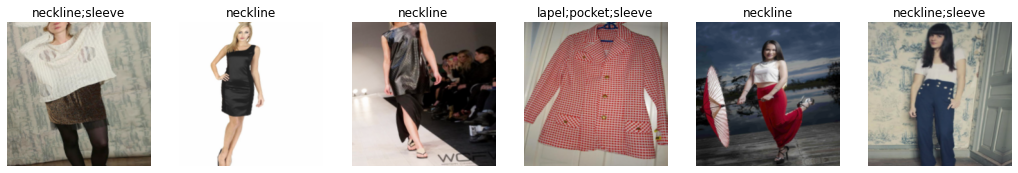

In [27]:
dls.show_batch(nrows=1, ncols=6)

In [28]:
dsets = dblock.datasets(df_train)

In [29]:
dsets.train[0]

(PILImage mode=RGB size=768x1024,
 TensorMultiCategory([1., 0., 0., 0., 1., 1., 1.]))

In [30]:
dsets.train[0]

(PILImage mode=RGB size=768x1024,
 TensorMultiCategory([1., 0., 0., 0., 1., 1., 1.]))

In [31]:
def accuracy_multi(inp, targ, thresh=0.5, sigmoid=True):
    "Compute accuracy when `inp` and `targ` are the same size."
    if sigmoid: inp = inp.sigmoid()
    return ((inp>thresh)==targ.bool()).float().mean()

In [32]:
dls.vocab

['collar', 'epaulette', 'hood', 'lapel', 'neckline', 'pocket', 'sleeve']

In [33]:
class LabelSmoothingBCEWithLogitsLossFlat(BCEWithLogitsLossFlat):
    def __init__(self, eps:float=0.1, **kwargs):
        self.eps = eps
        super().__init__(thresh=0.2, **kwargs)
    
    def __call__(self, inp, targ, **kwargs):
        # https://www.kaggle.com/c/siim-isic-melanoma-classification/discussion/166833#929222
        targ_smooth = targ.float() * (1. - self.eps) + 0.5 * self.eps
        return super().__call__(inp, targ_smooth, **kwargs)
    
    def __repr__(self):
        return "FlattenedLoss of LabelSmoothingBCEWithLogits()"

In [34]:
metrics=[FBetaMulti(2.0, 0.2, average='samples'), partial(accuracy_multi, thresh=0.2)]

In [35]:
wd      = 5e-7 #weight decay parameter
opt_func = partial(ranger, wd=wd)

In [36]:
# learn = cnn_learner(dls, resnet34, loss_func=BCEWithLogitsLossFlat(thresh=0.2), metrics=metrics, opt_func=opt_func).to_fp16()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


In [37]:
learn = cnn_learner(dls, resnet34, loss_func=LabelSmoothingBCEWithLogitsLossFlat(),
            metrics=metrics, opt_func=opt_func).to_fp16()

In [37]:
# learn.fine_tune(2)
# learn.save('atr-recognition-stage-1-resnet34')
# learn.load('C:\\Users\\johan\\Desktop\\fashionpedia\\models\\atr-recognition-stage-1-resnet34')

C:\Users\johan\AppData\Local\Programs\Python\Python38\lib\site-packages\torch\cuda\amp\grad_scaler.py:115: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


SuggestedLRs(valley=4.365158383734524e-05)

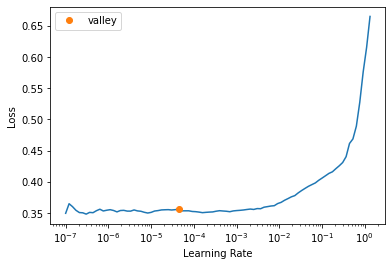

In [38]:
# learn.unfreeze()
# learn.lr_find()

In [39]:
# learn.fit_one_cycle(4, lr_max=slice(5e-7, 1e-4))

epoch,train_loss,valid_loss,fbeta_score,accuracy_multi,time
0,0.351026,0.340571,0.885875,0.855180,3:18:06
1,0.350689,0.338859,0.885967,0.856680,3:19:34
2,0.346304,0.338444,0.886256,0.855148,3:33:18
3,0.346772,0.337429,0.889199,0.862903,3:21:18


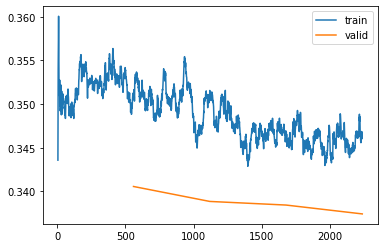

In [40]:
# learn.recorder.plot_loss()

In [43]:
# learn.save('atr-recognition-stage-2-resnet34')

Path('models/atr-recognition-stage-2-resnet34.pth')

# SAVING MODEL

In [40]:
learn.load("atr-recognition-stage-2-resnet34")

In [45]:
# modelname = learn.model
# modelname.cpu()
# torch.save(modelname, 'atr-recognition-stage-2-resnet34.pkl')

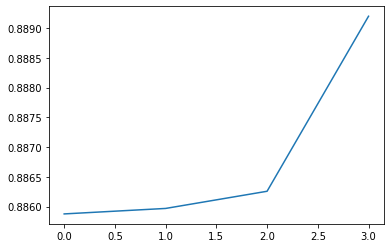

In [46]:
# plt.plot(L(learn.recorder.values).itemgot(2))

In [42]:
def predict_attribute(model, path, display_img=True):
    predicted = model.predict(path)
    if display_img:
        size = 244,244
        img=Image.open(path)
        img.thumbnail(size,Image.ANTIALIAS)
        imgplot = mpimg.imread(path)
        plt.imshow(imgplot)
    return predicted[0]

(#4) ['collar','hood','pocket','sleeve']

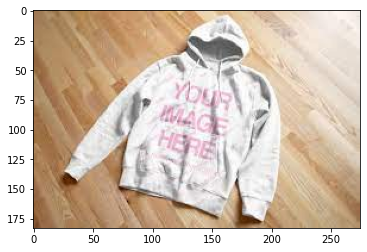

In [44]:
image_path = 'test4.jpg'
predict_attribute(learn, image_path)

# SAVED MODEL

In [54]:
pred = torch.load("atr-recognition-stage-2-resnet34.pkl")

In [61]:
model_path = 'models/atr-recognition-stage-2-resnet34.pth'
pred.load_state_dict(torch.load(model_path, map_location="cpu")['model'])
pred.eval()

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [71]:
image_dir = 'testing'
image_name = 'test4.jpg'

img = cv2.imread(os.path.join(image_dir,image_name))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [72]:
np.save('image1.npy', img)

In [79]:
with torch.no_grad():
    image = np.load('image1.npy')
    prediction = pred(image)

    # Predicted class value using argmax
    predicted_class = np.argmax(prediction)

    # Reshape image
    image = image.reshape(28, 28, 1)

    # Show result
    plt.imshow(image, cmap='gray')
    plt.title(f'Prediction: {predicted_class}')
    plt.show()

TypeError: conv2d() received an invalid combination of arguments - got (numpy.ndarray, Parameter, NoneType, tuple, tuple, tuple, int), but expected one of:
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, tuple of ints padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: (!numpy.ndarray!, !Parameter!, !NoneType!, !tuple!, !tuple!, !tuple!, int)
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, str padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: (!numpy.ndarray!, !Parameter!, !NoneType!, !tuple!, !tuple!, !tuple!, int)
